# 패키지 임포트

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
warnings.filterwarnings('ignore') # 파일 오류 무시
# plt.rc('font', family='Malgun Gothic') # 차트에 한글 글자 깨짐 방지

# 데이터 불러오기(대여이력)

In [265]:
# 데이터 부르기
bikes_temp = {}

for i in range(6):
    bikes_temp[i] = pd.read_csv(f'../../data/public_bike/bike_rent_{i+1}.csv', encoding='cp949', parse_dates=['대여일시'])

bikes_temp[0].head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


# 데이터 가공

In [266]:
# 데이터 병합
bikes = pd.concat(bikes_temp, axis='index', ignore_index=True)
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [267]:
# 데이터 조회
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 101.4+ MB


## 요약 통계(수치, 문자)

In [268]:
# 수치형 데이터 통계
bikes.describe()

,대여일시,대여 대여소번호,이용시간,이용거리
count,2215632,2.215632e+06,2.215632e+06,2.215632e+06
mean,2019-06-16 08:40:01.500303872,1.226154e+03,2.716998e+01,3.912916e+03
min,2019-06-01 00:00:00,3.000000e+00,1.000000e+00,0.000000e+00
25%,2019-06-08 22:04:00,5.050000e+02,8.000000e+00,1.220000e+03
50%,2019-06-16 15:13:00,1.159000e+03,1.700000e+01,2.270000e+03
75%,2019-06-23 20:22:00,1.846000e+03,3.700000e+01,4.670000e+03
max,2019-06-30 23:59:00,9.998000e+03,3.133000e+03,2.323100e+05
std,NaN,8.499197e+02,2.908119e+01,5.145471e+03


In [269]:
# 문자형 데이터 통계
bikes.describe(include=['object', 'datetime64'])

,자전거번호,대여일시,대여 대여소명
count,2215632,2215632,2215632
unique,19029,NaN,1543
top,SPB-17237,NaN,뚝섬유원지역 1번출구 앞
freq,292,NaN,12617
mean,NaN,2019-06-16 08:40:01.500303872,NaN
min,NaN,2019-06-01 00:00:00,NaN
25%,NaN,2019-06-08 22:04:00,NaN
50%,NaN,2019-06-16 15:13:00,NaN
75%,NaN,2019-06-23 20:22:00,NaN
max,NaN,2019-06-30 23:59:00,NaN


## 누락값 검사

In [270]:
# 누락값 검사
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

In [271]:
# 대여일시 정보 추출
bike_series = bikes['대여일시']
display(bike_series.shape)
display(bike_series.head(2))
bike_df = bikes[['대여 대여소번호', '대여 대여소명']]
display(bike_df.shape)
display(bike_df.head(2))

(2215632,)

0   2019-06-03 08:49:00
1   2019-06-03 08:33:00
Name: 대여일시, dtype: datetime64[ns]

(2215632, 2)

,대여 대여소번호,대여 대여소명
0,646,장한평역 1번출구 (국민은행앞)
1,526,용답토속공원 앞


In [272]:
# apply 메서드 확인
bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')

0          평일
1          평일
2          평일
3          평일
4          평일
           ..
2215627    평일
2215628    평일
2215629    평일
2215630    평일
2215631    평일
Name: 대여일시, Length: 2215632, dtype: object

## 요일 컬럼 추가

In [273]:
요일 = ['월','화','수','목','금','토','일']
bikes['요일'] = bikes['대여일시'].dt.day_of_week.apply(lambda x : 요일[x])
bikes['요일']

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [274]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,수
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,수
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,월


# 데이터 불러오기(대여소정보)

In [275]:
bike_shop = pd.read_excel('../../data/public_bike/공공자전거 대여소 정보_201905.xlsx')
display(bike_shop.shape)
display(bike_shop.head(2))

(1537, 6)

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20


# 데이터 가공(대여이력 + 대여소정보)

In [276]:
bikes_gu = bike_shop[['구분', '대여소번호', '대여소명', '대여소명', '위도', '경도']]
bikes_gu.head(2)

,구분,대여소번호,대여소명,대여소명,위도,경도
0,마포구,101,101. (구)합정동 주민센터,101. (구)합정동 주민센터,37.549561,126.905754
1,마포구,102,102. 망원역 1번출구 앞,102. 망원역 1번출구 앞,37.556000,126.910454


In [277]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월


In [278]:
# 대여소번호, 대여소명을 기준으로 병합
# pd.merge( df1, df2, left_on=‘df1_컬럼명’, right_on=‘df2_컬럼명’ )
# left_on : df1에 있는 컬럼명
# right_on : df2에 있는 컬럼명
bikes = pd.merge(bikes, bikes_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일,구분,대여소번호,대여소명,대여소명,위도,경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월,동대문구,646,646. 장한평역 1번출구 (국민은행앞),646. 장한평역 1번출구 (국민은행앞),37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월,성동구,526,526. 용답토속공원 앞,526. 용답토속공원 앞,37.563511,127.056725


### 중복되는 컬럼 삭제

In [279]:
# 중복되는 컬럼 삭제
bikes = bikes.drop(['대여소번호', '대여소명'], axis='columns')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일,구분,위도,경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월,동대문구,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월,성동구,37.563511,127.056725


### 컬럼명 변경

In [280]:
# 컬럼명 변경
bikes = bikes.rename(columns={'구분':'대여구',
                            '위도' : '대여점위도',
                            '경도' : '대여점경도'})
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월,동대문구,37.561867,127.064377
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월,성동구,37.563511,127.056725


# 데이터 분석

## 시간 개념에 따른 시각화

<Axes: xlabel='요일', ylabel='count'>

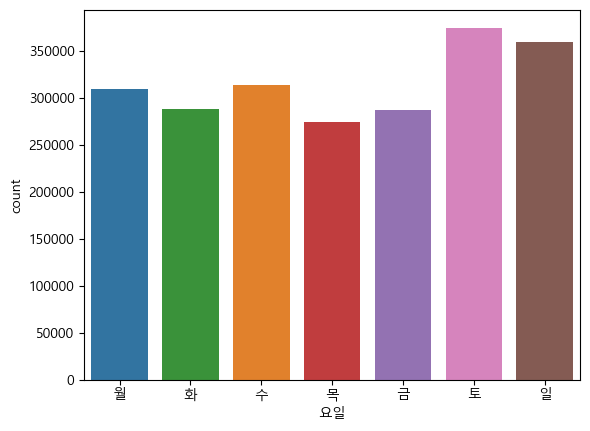

In [281]:
# seaborn으로 시각화
# sns.countplot( data=데이터프레임, x=‘``집계할 컬럼명’, hue=‘집계할 컬럼명’ )
sns.countplot(data=bikes, x='요일', order=['월','화','수','목','금','토','일'], hue='요일')

In [282]:
# 대여시간대, 일자 컬럼 생성
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대,일자
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월,동대문구,37.561867,127.064377,8,3
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월,성동구,37.563511,127.056725,8,3


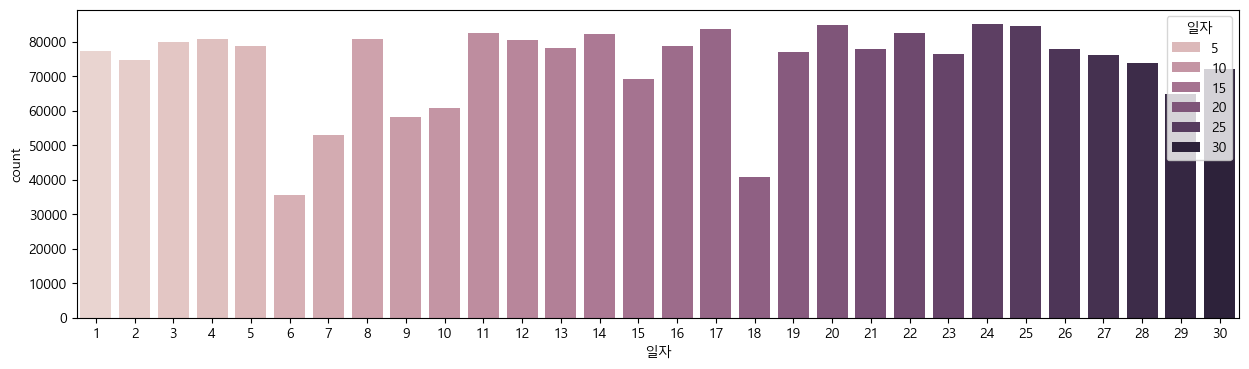

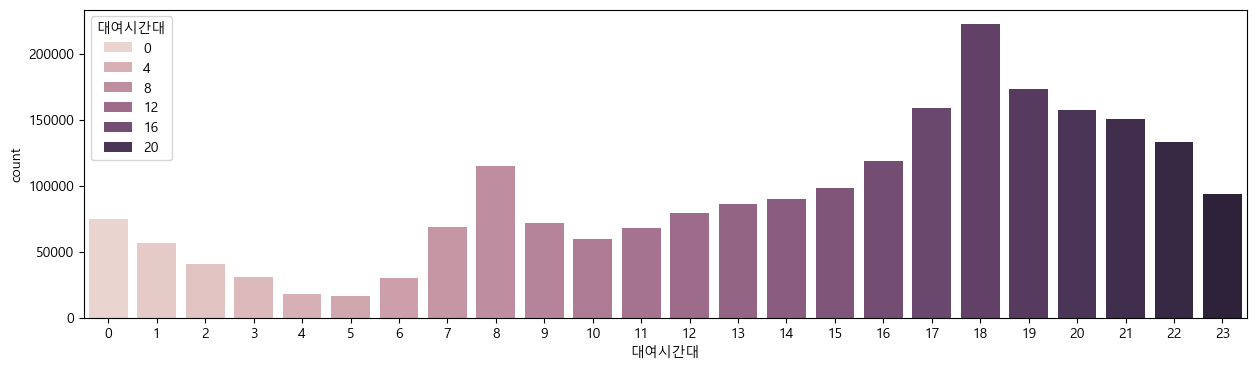

In [283]:
# sns.countplot( data=데이터프레임, x=‘``집계할 컬럼명’, hue=‘집계할 컬럼명’ )
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자', hue='일자')
plt.show()
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='대여시간대')
plt.show()

### 대여시간대 × 요일 따릉이 이용건수

In [284]:
# 피봇테이블 생성
bikes.pivot_table(index='대여시간대',
                columns='요일', 
                values='자전거번호', 
                aggfunc='count')

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971
5,2070,2451,2495,2069,2567,2619,2316
6,4252,4534,5393,4455,3311,3345,4633
7,10337,11324,13853,11418,4420,4869,12070
8,17164,17867,23542,18762,6651,8696,22119


In [285]:
# 요일과 시간대별 이용건수 피봇테이블
hourly_dayofweek_ride = bikes.pivot_table(
                        index='대여시간대',
                        columns='요일',
                        values='자전거번호',
                        aggfunc='count')
hourly_dayofweek_ride

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971
5,2070,2451,2495,2069,2567,2619,2316
6,4252,4534,5393,4455,3311,3345,4633
7,10337,11324,13853,11418,4420,4869,12070
8,17164,17867,23542,18762,6651,8696,22119


#### 대여시간대 × 요일 이용건수 시각화

<Axes: title={'center': '대여시간대 × 요일 이용건수'}, xlabel='대여시간대'>

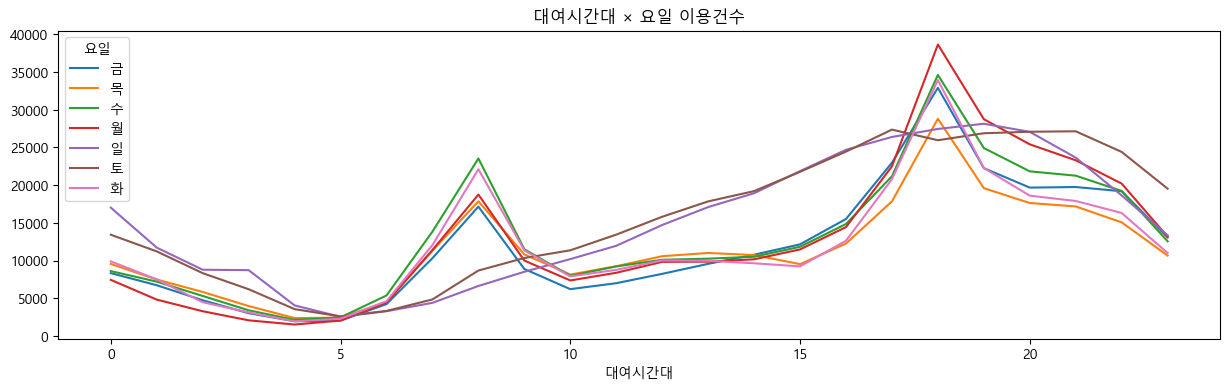

In [286]:
# 꺽은선 그래프
hourly_dayofweek_ride.plot(kind='line',title='대여시간대 × 요일 이용건수',figsize=(15,4))

<Axes: title={'center': '대여시간대 × 요일 이용건수'}, xlabel='대여시간대'>

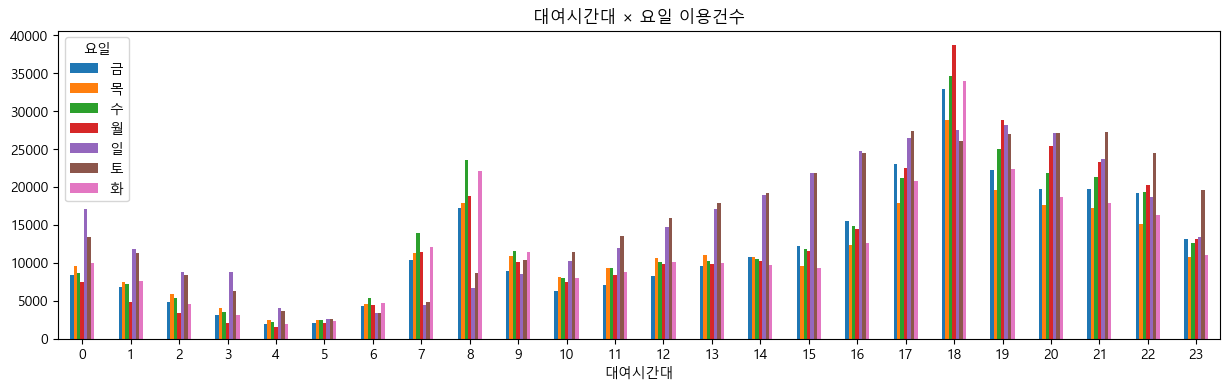

In [287]:
# 막대 그래프
hourly_dayofweek_ride.plot(kind='bar',title='대여시간대 × 요일 이용건수',figsize=(15,4),rot=0) # rot : x축 인덱스 글자 회전

<Axes: xlabel='대여시간대', ylabel='count'>

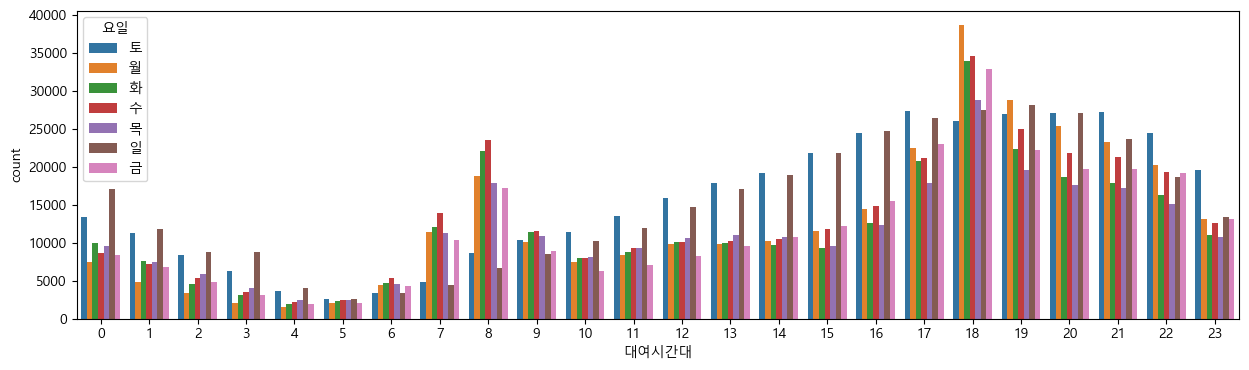

In [288]:
# seaborn countplot과 pivot table의 비교
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='요일')

#### 히트맵

<Axes: xlabel='요일', ylabel='대여시간대'>

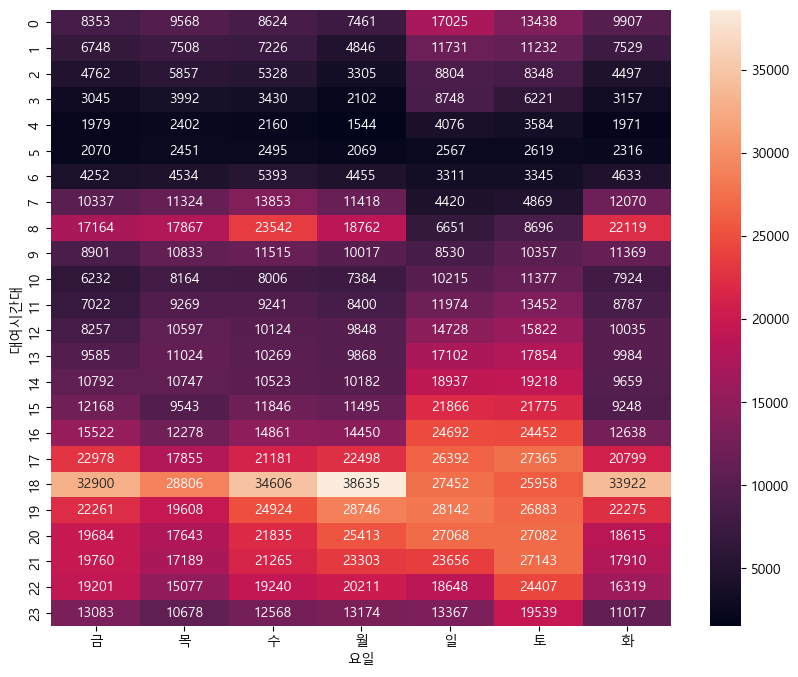

In [289]:
# 2차원 자료 시각화
# annot=True : 색깔을 나타내는 칸에 해당 집계 수량도 표시
# fmt=‘d’ : 포맷을 정수로 나타낸다는 표시
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')

### 대여시간대 × 주말구분 따릉이 이용건수

In [290]:
# 주말구분 컬럼 생성
bikes['주말구분'] = bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,요일,대여구,대여점위도,대여점경도,대여시간대,일자,주말구분
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,월,동대문구,37.561867,127.064377,8,3,평일
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,월,성동구,37.563511,127.056725,8,3,평일


In [291]:
weekedays_hourly_ride = bikes.pivot_table(
                        index='대여시간대',
                        columns='주말구분',
                        values='자전거번호',
                        aggfunc='count')
weekedays_hourly_ride

주말구분,주말,평일
대여시간대,,
0,30463,43913
1,22963,33857
2,17152,23749
3,14969,15726
4,7660,10056
5,5186,11401
6,6656,23267
7,9289,59002
8,15347,99454


#### 대여시간대 × 주말구분 따릉이 이용건수 시각화

<Axes: xlabel='대여시간대', ylabel='count'>

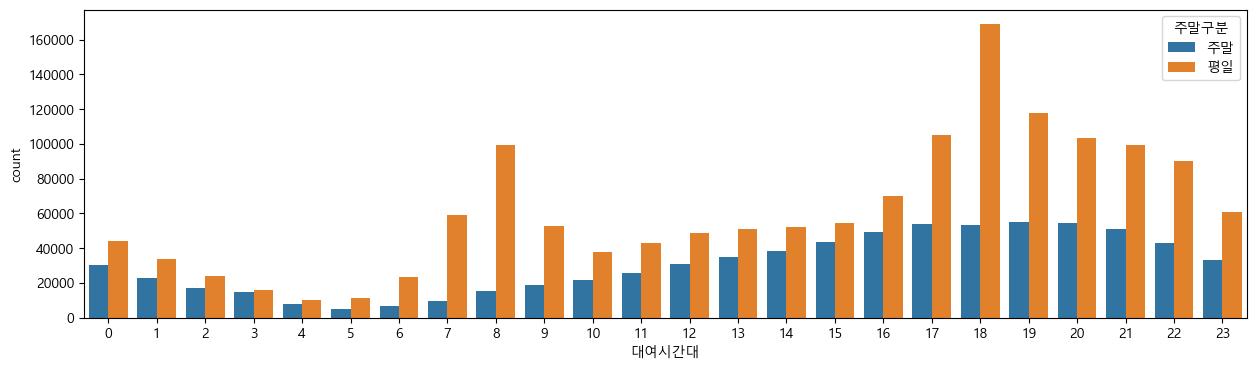

In [292]:
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대', hue='주말구분')

#### 히트맵

<Axes: xlabel='주말구분', ylabel='대여시간대'>

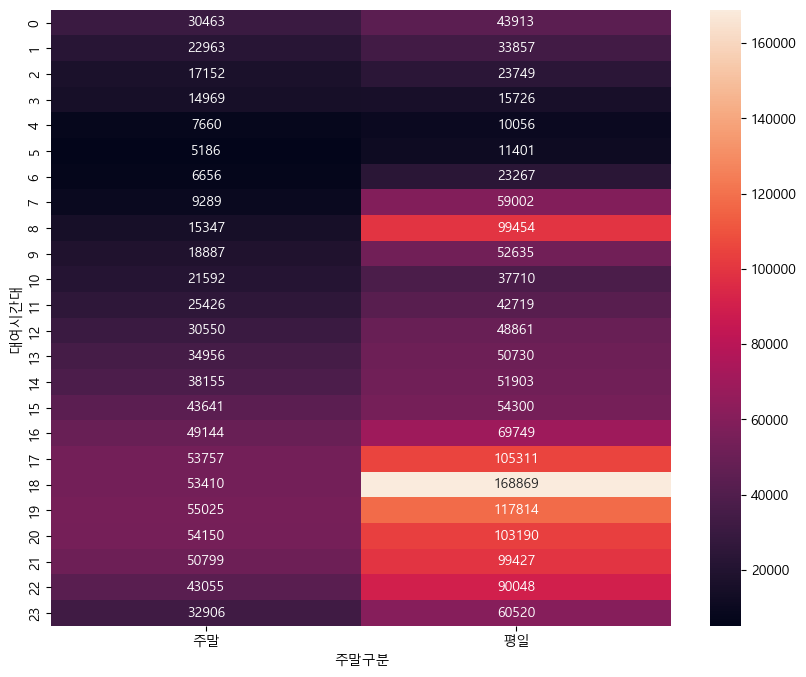

In [293]:
plt.figure(figsize=(10,8))
sns.heatmap(data=weekedays_hourly_ride, annot=True, fmt='d')

## 장소적 개념에 따른 시각화

In [294]:
# 구별이용시간평균 피봇테이블 생성
구별이용시간평균 = bikes.pivot_table(
                            index='대여구', 
                            values='이용시간',
                            aggfunc='mean').reset_index() # 대여구 데이터를 인덱스에서 컬럼으로 이동
구별이용시간평균

,대여구,이용시간
0,강남구,31.793657
1,강동구,25.392555
2,강북구,23.574736
3,강서구,23.142519
4,관악구,26.511609
5,광진구,24.952703
6,구로구,26.483316
7,금천구,26.403995
8,노원구,24.260931
9,도봉구,24.987803


In [295]:
# 이용시간 기준 오름차순 정렬
구별이용시간평균 = 구별이용시간평균.sort_values(by='이용시간',
                                            ascending=True)
구별이용시간평균

,대여구,이용시간
3,강서구,23.142519
16,성북구,23.170549
22,종로구,23.319499
2,강북구,23.574736
10,동대문구,23.777808
24,중랑구,24.242125
8,노원구,24.260931
5,광진구,24.952703
9,도봉구,24.987803
21,은평구,25.159375


### folium으로 지도 시각화

In [296]:
# map = folium.Map( location=지도중심위치, zoom_start=11 )
# folium.Map : 중심위치와 배율을 조정해서 지도를 초기화해서 보여준다.
# location=지도중심위치 : 중심위치의 위도와 경도를 입력한다.
# zoom_start=11 : 배율을 입력한다. 값이 크면 더 좁은 지역을 크게 볼 수 있다.
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()
center = [lat, lon]
map = folium.Map( location=center, zoom_start=11, width=700, height=700)
map

#### 지역구와 해당 수치 데이터 표시

In [297]:
import json # json 파일을 다루는 패키지

with open('../../data/public_bike/seoul.json', 'r', encoding='utf-8') as f:
    서울시지도 = json.load(f) # 서울시 지도데이터를 변수 할당

# map에 정보 추가
folium.Choropleth(
            geo_data=서울시지도, # 지역구를 표시할 지리 데이터
            data=구별이용시간평균, # 지도에 표시될 데이터프레임
            columns=['대여구', '이용시간'], # 데이트 프레임에서 지역구와 이용시간 컬럼
            fill_color='YlGnBu', # 표현할 색깔 : Yellow - Green - Blue
            key_on='feature.properties.name' # json파일에서 key값
).add_to(map)
map

<Axes: title={'center': '구별 이용시간 평균'}>

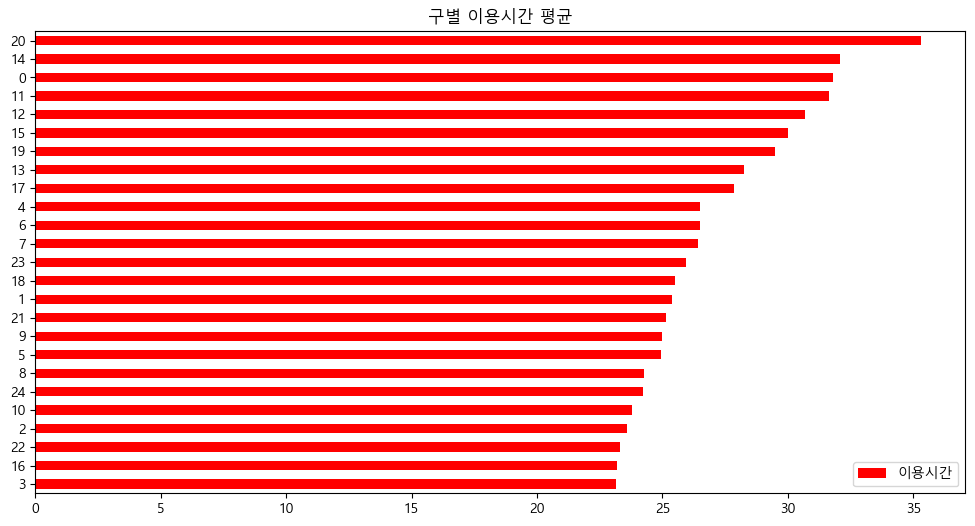

In [298]:
# 막대그래프 표시
구별이용시간평균.plot(kind='barh', title='구별 이용시간 평균', figsize=(12,6), color = 'r')

## 시간 × 장소적 특징 연관 분석 후 시각화

### 대여시간대 × 대여구별 피봇 테이블

In [299]:
hourly_gu_use = bikes.pivot_table(
                            index='대여시간대',
                            columns='대여구',
                            values='자전거번호',
                            aggfunc='count')
hourly_gu_use

대여구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
대여시간대,,,,,,,,,,,,,,,,,,,,,
0,2643,3230,2066,4459,3769,5314,2650,790,4855,1529,...,3003,3165,6014,2091,4892,1641,2389,1697,1180,2369
1,2660,2342,1706,3306,2830,3621,1797,650,3632,1297,...,2096,2501,5150,1770,3314,1334,1873,1299,893,1944
2,2360,1852,1378,2442,1899,2469,1291,496,2610,853,...,1394,1941,3339,1143,2190,935,1330,978,683,1413
3,1689,1398,932,1909,1550,1830,853,328,1932,668,...,1103,1337,2390,859,1627,755,977,749,564,1171
4,920,620,595,1152,990,998,572,173,1052,403,...,743,701,1252,479,1109,512,508,552,407,580
5,648,686,392,1072,745,992,543,161,829,416,...,698,522,1086,565,1140,305,527,741,442,597
6,1316,1173,499,2144,1042,1687,1081,511,1413,498,...,1092,1089,2326,988,2682,541,1025,1079,538,826
7,2404,2420,1047,4854,2800,3512,3091,1623,2841,1120,...,2588,2297,5214,2674,6516,1094,2430,2664,1259,2128
8,4951,3728,1533,9357,4350,6988,4691,3337,4491,1541,...,5446,3763,9105,3886,9939,1866,3420,4317,2262,3061


### 히트맵

<Axes: xlabel='대여시간대', ylabel='대여구'>

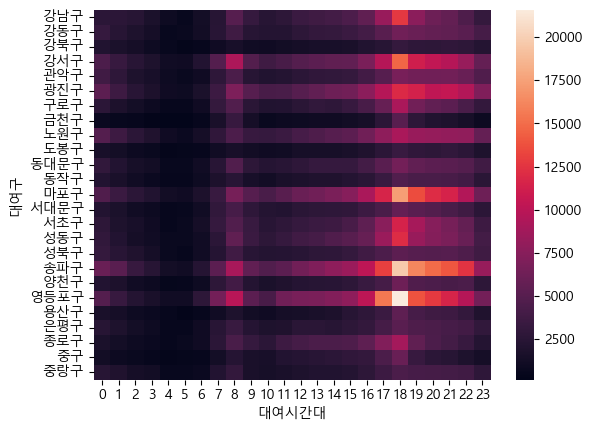

In [300]:
plt.plot(figsize=(10,8))
sns.heatmap(data=hourly_gu_use.T)

### 박스 그래프

<Axes: xlabel='대여구'>

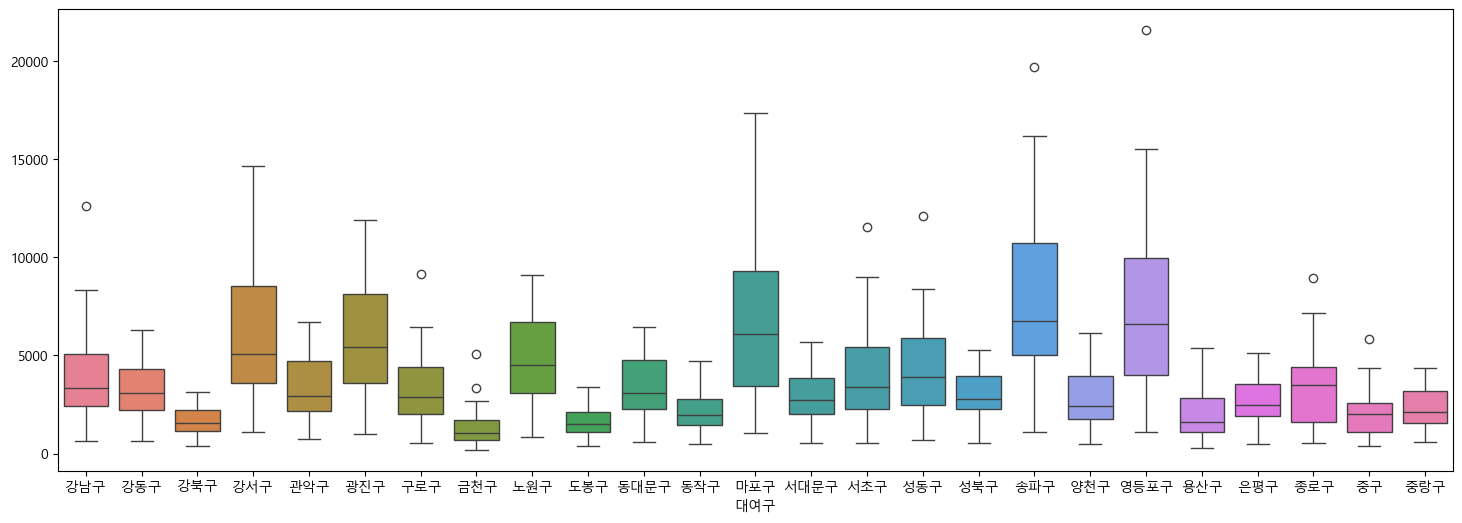

In [301]:
# seaborn의 boxplot
plt.figure(figsize=(18,6))
sns.boxplot(data=hourly_gu_use)

## 주말과 평일에 인기 있는 대여소 상위 50개 지도에 표시해보기

### 인기 대여소 50개 찾기

In [302]:
# 대여 대여소 × 주말구분의 이용거수 계산
rent_bike = bikes.pivot_table(
                        index=['대여 대여소명', '대여점위도', '대여점경도'],
                        columns='주말구분',
                        values='자전거번호',
                        aggfunc='count')
rent_bike.head(2)

,,주말구분,주말,평일
대여 대여소명,대여점위도,대여점경도,,
(구)신한은행 중랑교지점,37.598591,127.079819,391,832
(구)합정동 주민센터,37.549561,126.905754,357,715


#### 인기 있는 주말 대여소 50개 찾기

In [303]:
# 인기 있는 주말 대여소 50개 찾기
rent_bike.nlargest(50, '주말').head(5)

,,주말구분,주말,평일
대여 대여소명,대여점위도,대여점경도,,
뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777,6840
여의나루역 1번출구 앞,37.526989,126.932098,5286,6241
"고속터미널역 8-1번, 8-2번 출구 사이",37.506199,127.003944,3932,4556
봉림교 교통섬,37.484230,126.926392,3699,5986
롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,3231,5383


In [304]:
rent_bike.nlargest(50, '주말')['주말']

대여 대여소명                  대여점위도      대여점경도     
뚝섬유원지역 1번출구 앞            37.531860  127.067192    5777
여의나루역 1번출구 앞             37.526989  126.932098    5286
고속터미널역 8-1번, 8-2번 출구 사이  37.506199  127.003944    3932
봉림교 교통섬                  37.484230  126.926392    3699
롯데월드타워(잠실역2번출구 쪽)        37.513126  127.100960    3231
마포구민체육센터 앞               37.556610  126.898018    3229
건대입구역 사거리(롯데백화점)         37.539139  127.070618    3169
홍대입구역 2번출구 앞             37.557499  126.923805    2922
잠실새내역 5번 출구 뒤            37.511982  127.085052    2632
당산육갑문                    37.535339  126.903679    2327
신도림역 1번 출구 앞             37.509720  126.890099    2304
IFC몰                     37.526066  126.925537    2240
합정역 7번출구 앞               37.548645  126.912827    2194
동방1교                     37.471828  126.933922    2170
서울숲 관리사무소                37.542816  127.042084    2141
안암로터리 버스정류장 앞            37.582592  127.028976    2058
올림픽공원역 3번출구              37.516258  127.130592    2011
CJ 드림시티           

In [305]:
주말대여점50 = rent_bike.nlargest(50, '주말')['주말'].reset_index()
주말대여점50.head()

,대여 대여소명,대여점위도,대여점경도,주말
0,뚝섬유원지역 1번출구 앞,37.531860,127.067192,5777
1,여의나루역 1번출구 앞,37.526989,126.932098,5286
2,"고속터미널역 8-1번, 8-2번 출구 사이",37.506199,127.003944,3932
3,봉림교 교통섬,37.484230,126.926392,3699
4,롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,3231


##### 주말 인기 대여소 folium으로 지도 시각화

In [325]:
# folium.Marker( location=[위도, 경도], popup=‘이름’, icon = folium.Icon() ).add_to(map)
# folium.Marker : 지도에서 특정 위치를 아이콘으로 표시
# location=[위도, 경도] : 아이콘이 표시될 위치
# popup=‘이름’ : 아이콘으로 표시한 곳의 이름으로 아이콘을 클릭하면 이름이 나온다.
# icon = folium.Icon(color=‘red’, icon=‘star’) : 지정하지 않으면 기본적으로 파란색 info 모양의 아이콘으로 표시하고 folium.Icon을 사용하여 다른 것을 지정할 수 있다
map1 = folium.Map( location=center, zoom_start=11, width=700, height=700)
for i in 주말대여점50.index:
    sub_lat = 주말대여점50.loc[i, '대여점위도']
    sub_lon = 주말대여점50.loc[i, '대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여소명 = 주말대여점50.loc[i, '대여 대여소명']
    iframe = "<pre><b>대여소 이름:</b><br>"+str(대여점명)+"</pre>" # 팝업창 텍스트
    popup = folium.Popup(iframe, min_width=100, max_width=400) # 팝업창 크기 조절
    # 지도에 데이터 찍어서 보여주기
    folium.Marker(
        location=대여점위치,
        popup=popup,
        tooltip=대여소명, # 마우스 커서 올리면 뜨는 창
    ).add_to(map1)

map1

#### 인기 있는 평일 대여소 50개 찾기

In [307]:
평일대여점50 = rent_bike.nlargest(50, '평일')['평일'].reset_index()
평일대여점50.head()

,대여 대여소명,대여점위도,대여점경도,평일
0,뚝섬유원지역 1번출구 앞,37.531860,127.067192,6840
1,여의나루역 1번출구 앞,37.526989,126.932098,6241
2,봉림교 교통섬,37.484230,126.926392,5986
3,홍대입구역 2번출구 앞,37.557499,126.923805,5617
4,롯데월드타워(잠실역2번출구 쪽),37.513126,127.100960,5383


In [326]:
for i in 평일대여점50.index:
    sub_lat = 평일대여점50.loc[i, '대여점위도']
    sub_lon = 평일대여점50.loc[i, '대여점경도']
    대여점위치 = [sub_lat, sub_lon]
    대여소명 = 평일대여점50.loc[i, '대여 대여소명']
    iframe = "<pre><b>대여소 이름:</b><br>"+str(대여점명)+"</pre>" # 팝업창 텍스트
    popup = folium.Popup(iframe, min_width=100, max_width=400) # 팝업창 크기 조절
    # 지도에 데이터 찍어서 보여주기
    folium.Marker(
        location=대여점위치,
        popup=popup,
        tooltip=대여소명,  # 마우스 커서 올리면 뜨는 창
        icon=folium.Icon(color='red', icon='star')
    ).add_to(map1)
    
map1